Analysis of publicly-available microarray data, pipeline adapted from Cancer Research UK, Cambridge Centre
http://bioinformatics-core-shared-training.github.io/microarray-analysis/

If running for the first time

In [2]:
install.packages("rlang")
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(c("limma","affy","affyPLM","beadarray","GEOquery","genefilter","mouse4302.db","cluster",
                       "ggplot2","GOstats","pamr","ArrayExpress","RColorBrewer","arrayQualityMetrics"))

Bioconductor version 3.9 (BiocManager 1.30.4), R 3.6.0 (2019-04-26)

Update old packages: 'ade4', 'ape', 'backports', 'BH', 'bibtex', 'BiocManager',
  'boot', 'Cairo', 'callr', 'car', 'carData', 'CATALYST', 'caTools',
  'circlize', 'class', 'cli', 'crosstalk', 'curl', 'data.table',
  'DelayedMatrixStats', 'devtools', 'digest', 'dplyr', 'DT', 'e1071',
  'ellipsis', 'fansi', 'fitdistrplus', 'forcats', 'foreach', 'fs', 'future',
  'future.apply', 'GenomicRanges', 'GetoptLong', 'ggplot2', 'ggrepel',
  'ggridges', 'gh', 'git2r', 'GlobalOptions', 'globals', 'glue', 'gplots',
  'gtools', 'haven', 'HDF5Array', 'hexbin', 'hms', 'htmltools', 'htmlwidgets',
  'httpuv', 'IDPmisc', 'igraph', 'IRanges', 'IRkernel', 'jsonlite',
  'KernSmooth', 'lambda.r', 'later', 'lattice', 'latticeExtra', 'leiden',
  'listenv', 'lme4', 'maptools', 'MASS', 'Matrix', 'matrixStats', 'metap',
  'mgcv', 'mime', 'multcomp', 'mvtnorm', 'nlme', 'nloptr', 'nnet', 'openssl',
  'openxlsx', 'pbkrtest', 'pillar', 'pkgbuild', 'p

If packages are already installed:

In [1]:
library(rlang)
library(GEOquery)
library(affy)

Warning message:
“package ‘rlang’ was built under R version 3.6.2”
Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Welcom

Get data from Gene Expression Omnibus (GEO)

In [106]:
remotefile <- 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE11nnn/GSE11222/matrix/GSE11222_series_matrix.txt.gz'
destfile <- '/Users/bendalllab/Documents/PlacentaMAExpression/GSE11222_series_matrix.txt.gz'
if(!file.exists(destfile)) download.file(remotefile, destfile)
mydata<- getGEO(filename='/Users/bendalllab/Documents/PlacentaMAExpression/GSE11222_series_matrix.txt.gz')

Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)

See spec(...) for full column specifications.

Using locally cached version of GPL1261 found here:
/var/folders/6h/p430wr994951_g4zhrt6gpjm0000gn/T//RtmpyUYrHw/GPL1261.soft 

Warning message:
“64 parsing failures.
  row     col           expected    actual         file
45038 SPOT_ID 1/0/T/F/TRUE/FALSE --Control literal data
45039 SPOT_ID 1/0/T/F/TRUE/FALSE --Control literal data
45040 SPOT_ID 1/0/T/F/TRUE/FALSE --Control literal data
45041 SPOT_ID 1/0/T/F/TRUE/FALSE --Control literal data
45042 SPOT_ID 1/0/T/F/TRUE/FALSE --Control literal data
..... ....... .................. ......... ............
See problems(...) for more details.
”


In [107]:
mydata

ExpressionSet (storageMode: lockedEnvironment)
assayData: 45101 features, 42 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM282813 GSM282814 ... GSM282854 (42 total)
  varLabels: title geo_accession ... Tissue:ch1 (37 total)
  varMetadata: labelDescription
featureData
  featureNames: 1415670_at 1415671_at ... AFFX-TrpnX-M_at (45101 total)
  fvarLabels: ID GB_ACC ... Gene Ontology Molecular Function (16 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 18340042 
Annotation: GPL1261 

In [128]:
head(exprs(mydata))

,GSM282813,GSM282814,GSM282815,GSM282816,GSM282817,GSM282818,GSM282819,GSM282820,GSM282821,GSM282822,⋯,GSM282845,GSM282846,GSM282847,GSM282848,GSM282849,GSM282850,GSM282851,GSM282852,GSM282853,GSM282854
1415670_at,10.966209,10.335963,11.075964,11.365128,11.003741,11.217820,11.184458,11.080382,10.967677,10.890311,⋯,9.987562,10.353372,10.035969,9.942362,10.022305,10.117022,10.216049,9.907407,10.113251,10.008759
1415671_at,10.693243,10.539371,10.799352,11.031922,11.327328,11.094250,11.001801,11.372946,11.232942,11.283070,⋯,10.809217,11.198927,10.760299,10.853235,11.125541,11.143133,11.236589,10.916079,11.189063,10.723299
1415672_at,11.106341,11.570731,11.549713,11.109688,10.732725,11.096146,11.475512,11.528212,11.486816,11.555734,⋯,11.650432,11.780951,11.566088,11.618721,11.152759,11.748962,11.448391,11.529942,11.589170,11.550516
1415673_at,9.569996,9.975702,9.808168,9.714312,9.718322,9.908820,9.779731,9.506760,9.075966,9.131592,⋯,7.802394,7.862272,8.069514,7.721140,8.324806,7.578750,8.440072,7.104683,9.154967,8.781015
1415674_a_at,9.918902,9.493861,9.718074,9.761410,10.000237,9.841085,9.536321,9.862431,9.590475,9.678850,⋯,9.748080,9.544547,9.512731,9.607674,9.942799,9.672669,9.978665,9.473162,9.553679,9.547885
1415675_at,10.564120,10.231298,10.353511,10.779280,10.205309,10.434401,10.384548,10.197295,10.062307,10.161044,⋯,9.872422,9.535981,9.702306,9.503355,10.111972,9.684237,10.071796,9.519715,10.519994,10.497001


In [5]:
summary(exprs(mydata)[,1:5])

   GSM282813          GSM282814          GSM282815          GSM282816       
 Min.   :    1.00   Min.   :    1.00   Min.   :    1.00   Min.   :    1.00  
 1st Qu.:   79.35   1st Qu.:   86.41   1st Qu.:   84.95   1st Qu.:   80.45  
 Median :  165.62   Median :  180.51   Median :  182.34   Median :  169.08  
 Mean   :  511.94   Mean   :  519.49   Mean   :  546.21   Mean   :  521.89  
 3rd Qu.:  421.28   3rd Qu.:  436.53   3rd Qu.:  463.96   3rd Qu.:  428.15  
 Max.   :19931.07   Max.   :19529.30   Max.   :20312.82   Max.   :19770.86  
   GSM282817       
 Min.   :    1.00  
 1st Qu.:   79.48  
 Median :  161.99  
 Mean   :  491.59  
 3rd Qu.:  391.36  
 Max.   :21266.41  

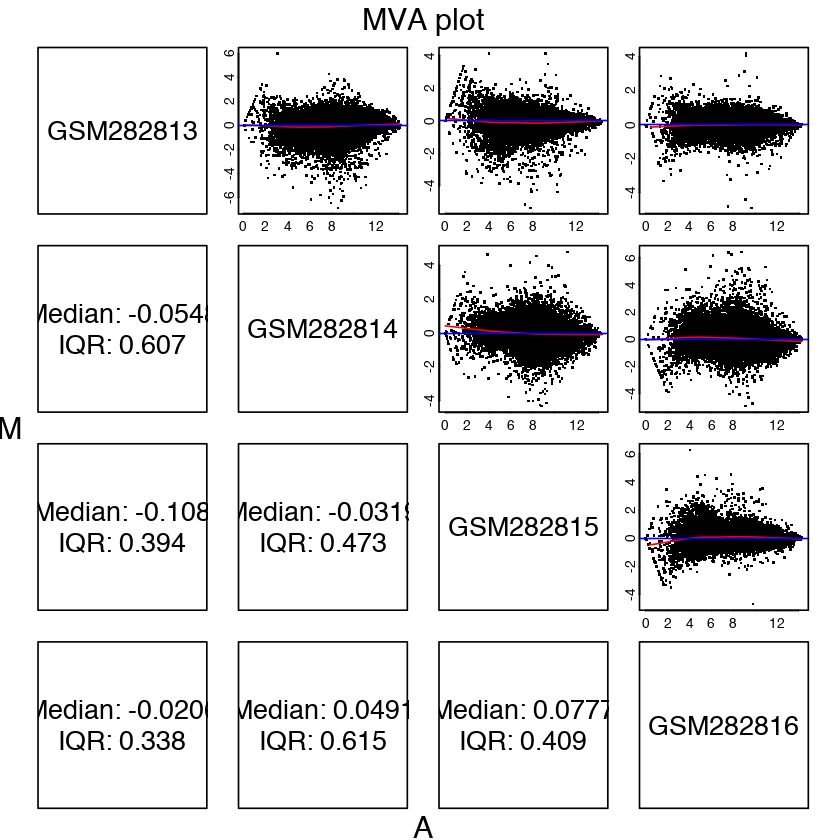

In [8]:
mva.pairs(exprs(mydata)[,1:4],log.it = TRUE)

# Quality assessment of the downloaded data
As we have downloaded the processed and normalised data, there are limited options in terms of quality assessment. Without the .cel files we cannot examine the raw images or fit PLMs. The simplest form of QA is the boxplot.

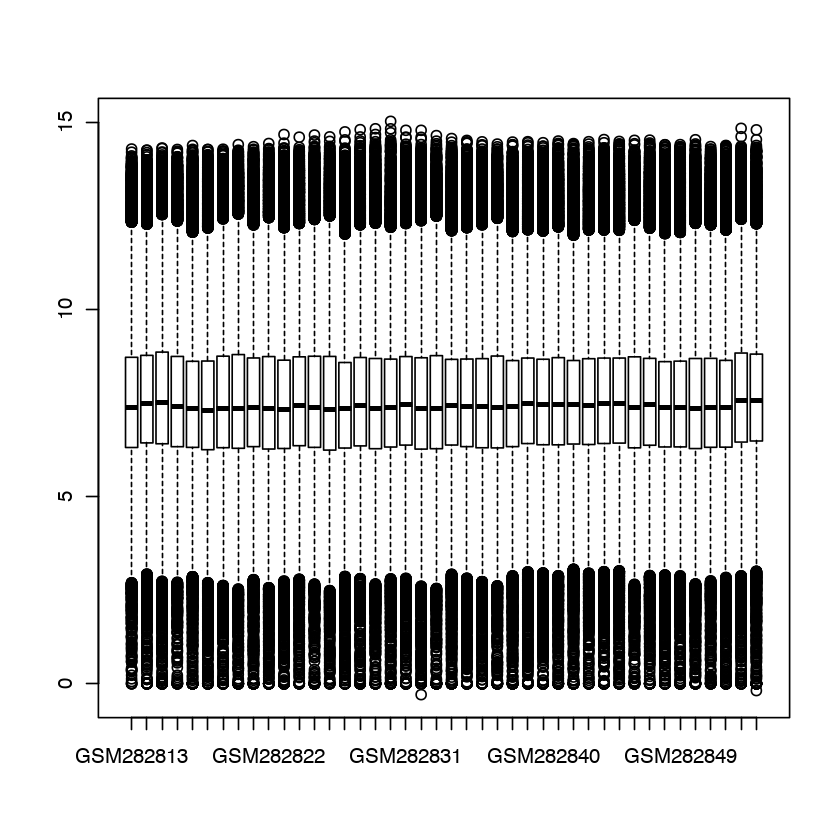

In [10]:
boxplot(log2(exprs(mydata)))

# Generate an arrayQualityMetrics report for the dataset. Do any arrays seem to be poor quality?

In [11]:
library(arrayQualityMetrics)
arrayQualityMetrics(mydata, force=TRUE)

The directory 'arrayQualityMetrics report for mydata' has been created.

Warning message in svgStyleAttributes(style, svgdev):
“Removing non-SVG style attribute name(s): subscripts, group.number, group.value”
Warning message in svgStyleAttributes(style, svgdev):
“Removing non-SVG style attribute name(s): subscripts, group.number, group.value”
Warning message in svgStyleAttributes(style, svgdev):
“Removing non-SVG style attribute name(s): subscripts, group.number, group.value”
Warning message in svgStyleAttributes(style, svgdev):
“Removing non-SVG style attribute name(s): subscripts, group.number, group.value”
Warning message in svgStyleAttributes(style, svgdev):
“Removing non-SVG style attribute name(s): subscripts, group.number, group.value”
Warning message in svgStyleAttributes(style, svgdev):
“Removing non-SVG style attribute name(s): subscripts, group.number, group.value”
Warning message in svgStyleAttributes(style, svgdev):
“Removing non-SVG style attribute name(s): subscripts, gr

To interpret figures: https://www.bioconductor.org/packages/release/bioc/vignettes/arrayQualityMetrics/inst/doc/arrayQualityMetrics.pdf

# Preparing the data for an over-representation test
Create a gene universe by removing genes that will not contribute to the subsequent analysis.
Generally less than half of microarray probes have enough detailed information to useful for a GO analysis. Therefore we restrict the dataset to only probes for which we have a Entrez ID. Moreover, we would like only the most-variable probe for a given gene.

In [68]:
library(genefilter)

In [109]:
exprs(mydata) <- log2(exprs(mydata))

In [112]:
annotation(mydata) <- "mouse4302"
filt <- nsFilter(mydata)


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:base’:

    expand.grid








In [113]:
filt

$eset
ExpressionSet (storageMode: lockedEnvironment)
assayData: 10277 features, 42 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM282813 GSM282814 ... GSM282854 (42 total)
  varLabels: title geo_accession ... Tissue:ch1 (37 total)
  varMetadata: labelDescription
featureData
  featureNames: 1436720_s_at 1424378_at ... 1426762_s_at (10277 total)
  fvarLabels: ID GB_ACC ... Gene Ontology Molecular Function (16 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 18340042 
Annotation: mouse4302 

$filter.log
$filter.log$numDupsRemoved
[1] 17422

$filter.log$numLowVar
[1] 10278

$filter.log$numRemoved.ENTREZID
[1] 7111

$filter.log$feature.exclude
[1] 13



In [114]:
mydata.filt <- filt$eset

In [188]:
colnames(fData(mydata.filt)) #column names of filtered functional data

[1] "ID"                               "GB_ACC"                          
 [3] "SPOT_ID"                          "Species Scientific Name"         
 [5] "Annotation Date"                  "Sequence Type"                   
 [7] "Sequence Source"                  "Target Description"              
 [9] "Representative Public ID"         "Gene Title"                      
[11] "Gene Symbol"                      "ENTREZ_GENE_ID"                  
[13] "RefSeq Transcript ID"             "Gene Ontology Biological Process"
[15] "Gene Ontology Cellular Component" "Gene Ontology Molecular Function"

In [123]:
anno.final <- fData(mydata.filt)
universeIds <- anno.final$ENTREZ_GENE_ID
length(universeIds)

[1] 10277

Write the selected Entrez IDs to a text file.
So that the file is recognised by DAVID (https://david.ncifcrf.gov/), we need to specify the argument row.names=FALSE to make sure that row numbers do not appear in the file.

In [124]:
write.table(universeIds, file="geneUniverse.txt",sep="\t",row.names = FALSE,quote=FALSE)

# Define groups to compare

In [129]:
library(stringr)

In [189]:
colnames(pData(mydata.filt)) #column names of filtered phenotype data

[1] "title"                   "geo_accession"          
 [3] "status"                  "submission_date"        
 [5] "last_update_date"        "type"                   
 [7] "channel_count"           "source_name_ch1"        
 [9] "organism_ch1"            "characteristics_ch1"    
[11] "characteristics_ch1.1"   "treatment_protocol_ch1" 
[13] "growth_protocol_ch1"     "molecule_ch1"           
[15] "extract_protocol_ch1"    "label_ch1"              
[17] "label_protocol_ch1"      "taxid_ch1"              
[19] "hyb_protocol"            "scan_protocol"          
[21] "description"             "data_processing"        
[23] "platform_id"             "contact_name"           
[25] "contact_laboratory"      "contact_department"     
[27] "contact_institute"       "contact_address"        
[29] "contact_city"            "contact_state"          
[31] "contact_zip/postal_code" "contact_country"        
[33] "supplementary_file"      "data_row_count"         
[35] "relation"                "Strain:ch1"             
[37] "Tissue:ch1"

In [190]:
pheno.df <- pData(mydata.filt)

In [191]:
pheno.df$title

[1] Placenta e8.5, biological rep3 (Series 2)               
 [2] Placenta e9.0, biological rep1 (Series 2)               
 [3] Placenta e9.0, biological rep2 (Series 2)               
 [4] Placenta e9.0, biological rep3 (Series 2)               
 [5] Placenta e10.5, biological rep1 (Series 2)              
 [6] Placenta e10.5, biological rep2 (Series 2)              
 [7] Placenta e10.5, biological rep3 (Series 2)              
 [8] Placenta e12.0, biological rep1 (Series 2)              
 [9] Placenta e12.0, biological rep2 (Series 2)              
[10] Placenta e12.0, biological rep3 (Series 2)              
[11] Placenta e13.5, biological rep1 (Series 2)              
[12] Placenta e13.5, biological rep2 (Series 2)              
[13] Placenta e15.0, biological rep1 (Series 2)              
[14] Placenta e15.0, biological rep2 (Series 2)              
[15] Placenta e15.0, biological rep3 (Series 2)              
[16] Placenta e17.0, biological rep1 (Series 2)              
[17] Placenta e17.0, biological rep2 (Series 2)              
[18] Placenta e17.0, biological rep3 (Series 2)              
[19] Placenta e19.0, biological rep1 (Series 2)              
[20] Placenta e19.0, biological rep2 (Series 2)              
[21] Placenta P0, biological rep1 (Series 2)                 
[22] Placenta P0, biological rep2 (Series 2)                 
[23] Decidua e8.5, biological rep1, technical rep1 (Series 2)
[24] Decidua e8.5, biological rep2, technical rep1 (Series 2)
[25] Decidua e8.5, biological rep1, technical rep2 (Series 2)
[26] Decidua e8.5, biological rep2, technical rep2 (Series 2)
[27] Decidua e9.0, biological rep1 (Series 2)                
[28] Decidua e9.0, biological rep2 (Series 2)                
[29] Decidua e10.5, biological rep1 (Series 2)               
[30] Decidua e10.5, biological rep2 (Series 2)               
[31] Decidua e12.0, biological rep1 (Series 2)               
[32] Decidua e12.0, biological rep2 (Series 2)               
[33] Decidua e15.0, biological rep1 (Series 2)               
[34] Decidua e15.0, biological rep2 (Series 2)               
[35] Decidua e17.0, biological rep1 (Series 2)               
[36] Decidua e17.0, biological rep2 (Series 2)               
[37] Decidua e19.0, biological rep1 (Series 2)               
[38] Decidua e19.0, biological rep2 (Series 2)               
[39] Decidua P0, biological rep1 (Series 2)                  
[40] Decidua P0, biological rep2 (Series 2)                  
[41] Placenta and Decidua e17.0, biological rep 1 (Series 2) 
[42] Placenta and Decidua e17.0, biological rep 2 (Series 2) 
42 Levels: Decidua e10.5, biological rep1 (Series 2) ...

separate decidua data from placenta

In [249]:
decidua.filt <- mydata.filt[,-grep("Placenta|technical rep2", pData(mydata.filt)$title)]
placenta.filt <- mydata.filt[,-grep("Decidua|technical rep2",  pData(mydata.filt)$title)]

keep decidua and placenta together to see if values of microarray can be combined

In [387]:
full_organ.filt <- mydata.filt[,-grep("and|technical rep2",  pData(mydata.filt)$title)]

In [251]:
dec_p <- str_split_fixed(pData(decidua.filt)$title, " |,", 3)
full_p <- str_split_fixed(pData(full_organ.filt)$title, " |,", 3)
plc_p <- str_split_fixed(pData(placenta.filt)$title, " |,", 3)

In [252]:
colnames(dec_p) <- c("organ", "day", "extra")
colnames(full_p) <- c("organ", "day", "extra")
colnames(plc_p) <- c("organ", "day", "extra")

In [254]:
pData(decidua.filt)$day <-dec_p[, "day"]
pData(full_organ.filt)$day <-full_p[, "day"]
pData(placenta.filt)$day <-plc_p[, "day"]

In [392]:
head(pData(full_organ.filt))

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,contact_city,contact_state,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,relation,Strain:ch1,Tissue:ch1,day
,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>
GSM282813,"Placenta e8.5, biological rep3 (Series 2)",GSM282813,Public on Apr 23 2008,Apr 21 2008,Apr 22 2008,RNA,1,"Mouse placental tissue at embryonic day 8.5, biological replicate 3",Mus musculus,Strain: Swiss Webster,⋯,Stanford,CA,94304,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM282nnn/GSM282813/suppl/GSM282813.CEL.gz,45101,,Swiss Webster,placenta (fetal origin),e8.5
GSM282814,"Placenta e9.0, biological rep1 (Series 2)",GSM282814,Public on Apr 23 2008,Apr 21 2008,Apr 22 2008,RNA,1,"Mouse placental tissue at embryonic day 9.0, biological replicate 1",Mus musculus,Strain: Swiss Webster,⋯,Stanford,CA,94304,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM282nnn/GSM282814/suppl/GSM282814.CEL.gz,45101,,Swiss Webster,placenta (fetal origin),e9.0
GSM282815,"Placenta e9.0, biological rep2 (Series 2)",GSM282815,Public on Apr 23 2008,Apr 21 2008,Apr 22 2008,RNA,1,"Mouse placental tissue at embryonic day 9.0, biological replicate 2",Mus musculus,Strain: Swiss Webster,⋯,Stanford,CA,94304,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM282nnn/GSM282815/suppl/GSM282815.CEL.gz,45101,,Swiss Webster,placenta (fetal origin),e9.0
GSM282816,"Placenta e9.0, biological rep3 (Series 2)",GSM282816,Public on Apr 23 2008,Apr 21 2008,Apr 22 2008,RNA,1,"Mouse placental tissue at embryonic day 9.0, biological replicate 3",Mus musculus,Strain: Swiss Webster,⋯,Stanford,CA,94304,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM282nnn/GSM282816/suppl/GSM282816.CEL.gz,45101,,Swiss Webster,placenta (fetal origin),e9.0
GSM282817,"Placenta e10.5, biological rep1 (Series 2)",GSM282817,Public on Apr 23 2008,Apr 21 2008,Apr 22 2008,RNA,1,"Mouse placental tissue at embryonic day 10.5, biological replicate 1",Mus musculus,Strain: Swiss Webster,⋯,Stanford,CA,94304,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM282nnn/GSM282817/suppl/GSM282817.CEL.gz,45101,,Swiss Webster,placenta (fetal origin),e10.5
GSM282818,"Placenta e10.5, biological rep2 (Series 2)",GSM282818,Public on Apr 23 2008,Apr 21 2008,Apr 22 2008,RNA,1,"Mouse placental tissue at embryonic day 10.5, biological replicate 2",Mus musculus,Strain: Swiss Webster,⋯,Stanford,CA,94304,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM282nnn/GSM282818/suppl/GSM282818.CEL.gz,45101,,Swiss Webster,placenta (fetal origin),e10.5


In [381]:
write.csv(pData(decidua.filt),"decidua_sample_info.csv")
write.csv(pData(full_organ.filt),"full_sample_info.csv")
write.csv(pData(placenta.filt),"placenta_sample_info.csv")

# Immune marker expression

https://www.immport.org/resources xls -> csv

In [295]:
immune_all <- read.csv('GOappend1.csv')

In [296]:
head(immune_all)

Symbol,Molecular.Function,Biological.Process,Cellular.Component,Category
<fct>,<fct>,<fct>,<fct>,<fct>
AZGP1,GO:0005504;fatty acid binding|GO:0004540;ribonuclease activity|GO:0008320;protein transmembrane transporter activity,GO:0006955;immune response|GO:0016042;lipid catabolic process|GO:0008285;negative regulation of cell proliferation|GO:0007155;cell adhesion|GO:0019882;antigen processing and presentation,GO:0005576;extracellular region|GO:0016020;membrane|GO:0042612;MHC class I protein complex,Antigen_Processing_and_Presentation_geneOntology
B2M,GO:0005515;protein binding,GO:0006955;immune response|GO:0002474;antigen processing and presentation of peptide antigen via MHC class I,GO:0005576;extracellular region|GO:0042612;MHC class I protein complex|GO:0031901;early endosome membrane|GO:0000139;Golgi membrane|GO:0005794;Golgi apparatus|GO:0005886;plasma membrane,Antigen_Processing_and_Presentation_geneOntology
CALR,GO:0005509;calcium ion binding|GO:0050681;androgen receptor binding|GO:0001849;complement component C1q binding|GO:0016564;transcription repressor activity|GO:0003677;DNA binding|GO:0005178;integrin binding|GO:0005529;sugar binding|GO:0008270;zinc ion binding|GO:0051082;unfolded protein binding|GO:0003729;mRNA binding|GO:0051087;chaperone binding,"GO:0042981;regulation of apoptosis|GO:0045740;positive regulation of DNA replication|GO:0048387;negative regulation of retinoic acid receptor signaling pathway|GO:0006611;protein export from nucleus|GO:0010149;senescence|GO:0030866;cortical actin cytoskeleton organization|GO:0045787;positive regulation of cell cycle|GO:0050766;positive regulation of phagocytosis|GO:0050821;protein stabilization|GO:0006355;regulation of transcription, DNA-dependent|GO:0002502;peptide antigen assembly with MHC class I protein complex|GO:0017148;negative regulation of translation|GO:0042921;glucocorticoid receptor signaling pathway|GO:0008284;positive regulation of cell proliferation|GO:0045665;negative regulation of neuron differentiation|GO:0007050;cell cycle arrest|GO:0022417;protein maturation via protein folding|GO:0033144;negative regulation of steroid hormone receptor signaling pathway|GO:0000122;negative regulation of transcription from RNA polymerase II promoter|GO:0040020;regulation of meiosis|GO:0051208;sequestering of calcium ion",GO:0009897;external side of plasma membrane|GO:0005576;extracellular region|GO:0005788;endoplasmic reticulum lumen|GO:0005844;polysome|GO:0048471;perinuclear region of cytoplasm|GO:0005792;microsome|GO:0005578;proteinaceous extracellular matrix|GO:0005634;nucleus|GO:0005829;cytosol|GO:0005615;extracellular space|GO:0005737;cytoplasm|GO:0005783;endoplasmic reticulum|GO:0042824;MHC class I peptide loading complex,Antigen_Processing_and_Presentation_geneOntology
CANX,GO:0051082;unfolded protein binding|GO:0005509;calcium ion binding|GO:0005529;sugar binding,GO:0009306;protein secretion|GO:0006457;protein folding,GO:0005783;endoplasmic reticulum|GO:0016020;membrane|GO:0005789;endoplasmic reticulum membrane|GO:0016021;integral to membrane|GO:0042470;melanosome,Antigen_Processing_and_Presentation_geneOntology
CD1A,,GO:0006955;immune response|GO:0019882;antigen processing and presentation,GO:0005887;integral to plasma membrane|GO:0005886;plasma membrane|GO:0005768;endosome|GO:0010008;endosome membrane|GO:0042612;MHC class I protein complex,Antigen_Processing_and_Presentation_geneOntology
CD1B,GO:0005515;protein binding,GO:0019882;antigen processing and presentation|GO:0006955;immune response,GO:0005886;plasma membrane|GO:0016021;integral to membrane|GO:0042612;MHC class I protein complex|GO:0005765;lysosomal membrane|GO:0005768;endosome|GO:0010008;endosome membrane,Antigen_Processing_and_Presentation_geneOntology


In [394]:
anno_dec <- fData(decidua.filt)

In [302]:
decidua.immune <- anno_dec[toupper(anno_dec$"Gene Symbol") %in% immune_all$Symbol, ]

In [372]:
dec.immune.vals <- data.frame(exprs(decidua.filt)[rownames(decidua.immune),])

In [376]:
dec.immune.vals$Symbol <- decidua.immune$"Gene Symbol"

In [380]:
write.csv(dec.immune.vals,"decidua_immune_exprs.csv")

# Plot immune genes in decidua

In [1]:
install.packages(c("tibble", "tidyverse"))

also installing the dependencies ‘ggplot2’, ‘readr’, ‘tidyr’





The downloaded binary packages are in
	/var/folders/6h/p430wr994951_g4zhrt6gpjm0000gn/T//Rtmpf1OExc/downloaded_packages


In [115]:
library(ggplot2)
library(gplots)
library(tidyverse)
library(RColorBrewer)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




In [11]:
dec.immune.vals <- read.csv("decidua_immune_exprs.csv", row.names = 1)
dec.pheno <- read.csv("decidua_sample_info.csv", row.names = 1)

In [173]:
dec.dayGroup <- dec.pheno$day

In [53]:
rownames(dec.immune.vals) <- dec.immune.vals$Symbol

In [55]:
colnames(dec.immune.vals) <- dec.dayGroup

In [82]:
head(dec.immune.vals)

,e8.5,e8.5,e9.0,e9.0,e10.5,e10.5,e12.0,e12.0,e15.0,e15.0,e17.0,e17.0,e19.0,e19.0,P0,P0,NA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Nrg2,6.543681,6.606383,7.668573,7.531108,7.546231,7.286003,7.457479,7.473714,8.026064,6.422687,7.894539,6.339333,7.093180,6.142373,7.849749,6.522731,Nrg2
Cmtm7,10.119666,10.493967,10.179749,10.285343,10.192417,9.877947,9.546538,9.469807,9.160557,9.347269,9.162291,9.116599,9.801986,9.661990,9.363026,9.316768,Cmtm7
Lgr4,8.382231,8.314588,8.194259,8.034799,7.874096,7.746340,7.339066,7.766542,7.466032,7.726402,8.285939,7.825951,7.860950,8.386031,8.819831,8.071618,Lgr4
Il1rl2,8.087675,8.186010,7.902869,7.948998,7.784792,7.346851,7.524706,7.474006,6.137606,6.774827,5.977623,6.127489,6.283700,6.472634,5.976776,6.584857,Il1rl2
Sema3d,3.971681,3.648235,4.536115,3.610228,2.832688,3.846894,2.803020,3.434295,2.576038,3.284958,2.787432,3.428008,3.155911,3.389980,3.078951,3.300270,Sema3d
Card11,8.192357,8.337283,8.079202,8.141305,8.072669,7.881940,7.869452,7.820217,7.676542,7.989985,7.649342,8.218355,7.616336,7.811458,7.444385,7.717882,Card11


In [129]:
col <- colorRampPalette(brewer.pal(10, "YlOrRd"))(256)

Warning message in brewer.pal(10, "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”


In [134]:
colnames(dec.immune.vals)

[1] "e8.5"  "e8.5"  "e9.0"  "e9.0"  "e10.5" "e10.5" "e12.0" "e12.0" "e15.0"
[10] "e15.0" "e17.0" "e17.0" "e19.0" "e19.0" "P0"    "P0"    NA

Warning message in heatmap.2(as.matrix(dec.immune.vals[, 1:14]), trace = "none", :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”


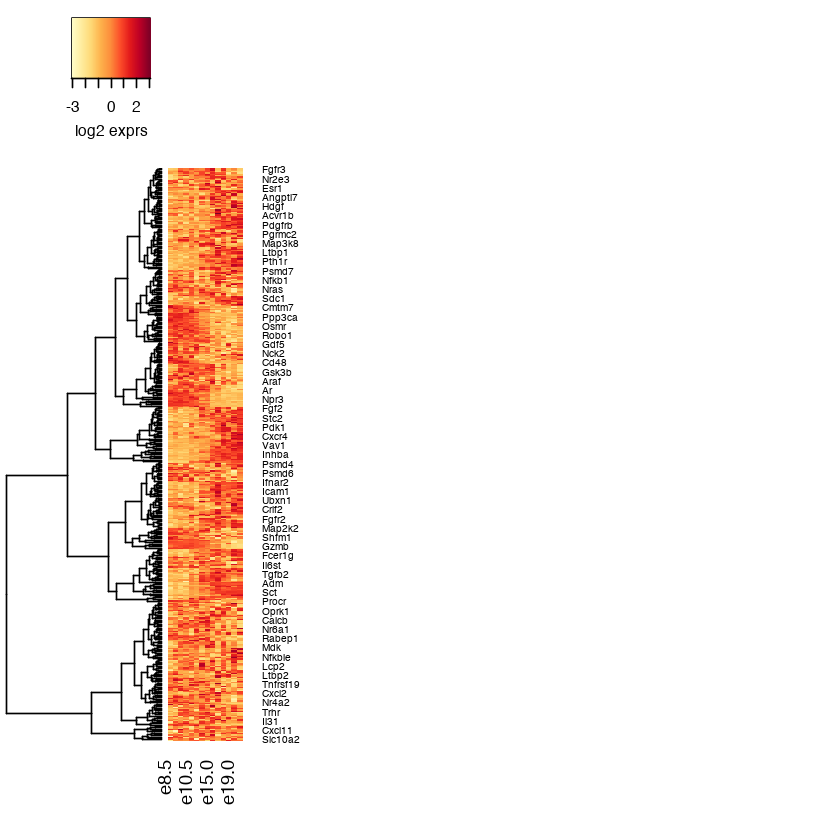

In [168]:
heatmap.2 (as.matrix(dec.immune.vals[, 1:14]), trace="none", keysize = 1,
            density.info = "none", key.title = NA, key.xlab = "log2 exprs", scale = "row", 
           col = col, Rowv = TRUE, Colv = FALSE, margins = c(5,30))

# Determine statistically significant differences between groups

In [151]:
library(limma)

In [174]:
dec.dayGroup 

[1] e8.5  e8.5  e9.0  e9.0  e10.5 e10.5 e12.0 e12.0 e15.0 e15.0 e17.0 e17.0
[13] e19.0 e19.0 P0    P0   
Levels: e10.5 e12.0 e15.0 e17.0 e19.0 e8.5 e9.0 P0

In [175]:
design <- model.matrix(~0+ dec.dayGroup)

In [176]:
design

dec.dayGroupe10.5,dec.dayGroupe12.0,dec.dayGroupe15.0,dec.dayGroupe17.0,dec.dayGroupe19.0,dec.dayGroupe8.5,dec.dayGroupe9.0,dec.dayGroupP0
0,0,0,0,0,1,0,0
0,0,0,0,0,1,0,0
0,0,0,0,0,0,1,0
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0
0,1,0,0,0,0,0,0
0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0


In [177]:
colnames(design) <- c("E10.5","E12.0", "E15.0","E17.0","E19.0","E8.5","E9.0","P0")

In [178]:
fit <- lmFit(dec.immune.vals[, 1:16], design)
names(fit)

[1] "coefficients"     "rank"             "assign"           "qr"              
 [5] "df.residual"      "sigma"            "cov.coefficients" "stdev.unscaled"  
 [9] "pivot"            "Amean"            "method"           "design"

In [179]:
dim(fit$coefficients)

[1] 436   8

In [180]:
head(fit$coefficients)

,E10.5,E12.0,E15.0,E17.0,E19.0,E8.5,E9.0,P0
Nrg2,7.416117,7.465597,7.224376,7.116936,6.617776,6.575032,7.599841,7.186240
Cmtm7,10.035182,9.508172,9.253913,9.139445,9.731988,10.306817,10.232546,9.339897
Lgr4,7.810218,7.552804,7.596217,8.055945,8.123490,8.348409,8.114529,8.445724
Il1rl2,7.565821,7.499356,6.456216,6.052556,6.378167,8.136843,7.925934,6.280817
Sema3d,3.339791,3.118657,2.930498,3.107720,3.272945,3.809958,4.073171,3.189611
Card11,7.977304,7.844835,7.833264,7.933849,7.713897,8.264820,8.110254,7.581134


Now we define the contrast

In [181]:
contrasts <- makeContrasts(E15.0 - E9.0, levels=design)
fit2 <- contrasts.fit(fit, contrasts)
head(fit2$coeff)

,E15.0 - E9.0
Nrg2,-0.3754651
Cmtm7,-0.9786327
Lgr4,-0.5183124
Il1rl2,-1.4697174
Sema3d,-1.1426730
Card11,-0.2769899


apply the empirical Bayes’ step

In [182]:
fit2 <- eBayes(fit2)

The rows in this table are ordered according the B-statistic, or log-odds from the empirical Bayes’ analysis. You should be cautious when interpreting these values. Although a B-statistic of 0 corresponds to a 50/50 chance of a gene being DE, this is contingent on a certain percentage of genes in the experiment being DE. 

In [183]:
topTable(fit2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aplnr,-4.565362,7.782525,-16.35944,2.031621e-09,5.362140e-07,12.206163
Bmp2,-5.661008,8.897290,-16.08335,2.459697e-09,5.362140e-07,12.021674
Cyr61,3.815809,11.365591,13.25789,2.111465e-08,3.068662e-06,9.908343
Nov,5.791235,9.511720,12.81859,3.058526e-08,3.333794e-06,9.537837
Igf1,-4.233568,8.323401,-12.49548,4.045760e-08,3.527903e-06,9.257094
Sema3g,4.664784,10.674167,12.19857,5.261054e-08,3.823033e-06,8.992717
Adm,2.629954,12.642512,11.84954,7.215773e-08,4.034113e-06,8.673775
Ctgf,2.621204,12.876598,11.82176,7.402042e-08,4.034113e-06,8.648003
Sdc4,2.133157,11.069927,11.60515,9.045551e-08,4.382067e-06,8.445025


In [184]:
#Make a note of how many genes are differentially expressed in decidua E9.0 vs E15.0
sum(abs(decideTests(fit2))==1)

[1] 145

In [236]:
test_result <-as.data.frame(decideTests(fit2))

In [237]:
test_result$abs <- abs(decideTests(fit2))

In [262]:
diff_imm_genes <- rownames(test_result[which(test_result$abs  == 1),])
up_imm_genes <- rownames(test_result[which(test_result$"E15.0 - E9.0"  == 1),])
down_imm_genes <- rownames(test_result[which(test_result$"E15.0 - E9.0"  == -1),])

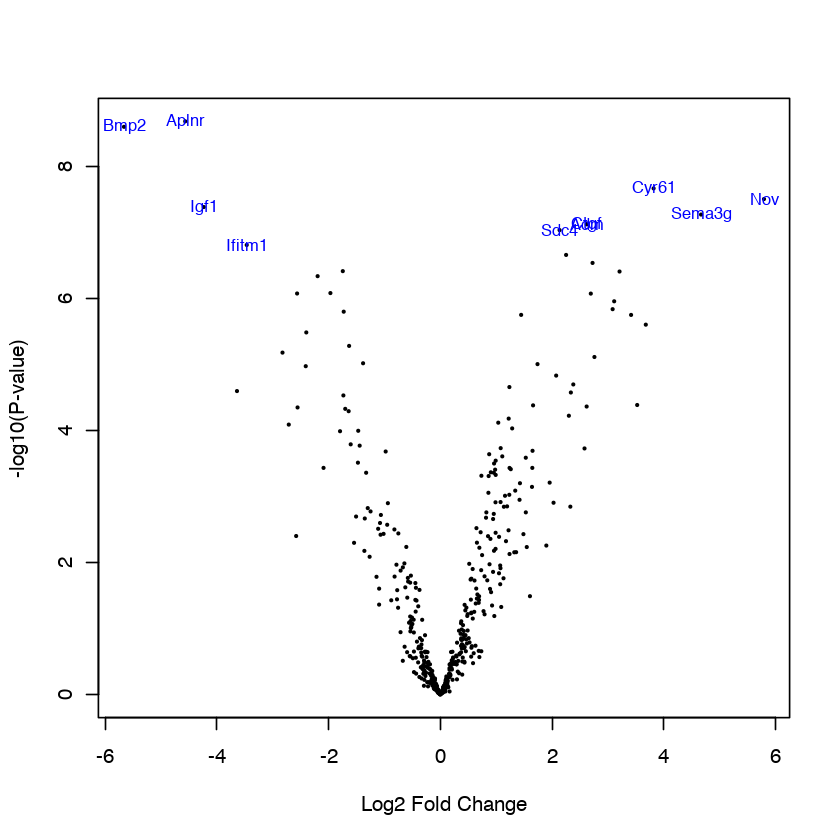

In [188]:
volcanoplot(fit2,highlight=10,names = rownames(fit2))

In [186]:
#Exporting the results
write.fit(fit2, file = "de-results_decidua_imm_E9_v_E15.txt",adjust="BH")

# Plotting only genes that changed between E9.0 and E15.0

In [263]:
decidua.immune.ch <- dec.immune.vals[rownames(dec.immune.vals) %in% diff_imm_genes, 1:14]
decidua.immune.up <- dec.immune.vals[rownames(dec.immune.vals) %in% up_imm_genes, 1:14]
decidua.immune.down <- dec.immune.vals[rownames(dec.immune.vals) %in% down_imm_genes, 1:14]

Warning message in heatmap.2(as.matrix(decidua.immune.ch), trace = "none", keysize = 1, :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”


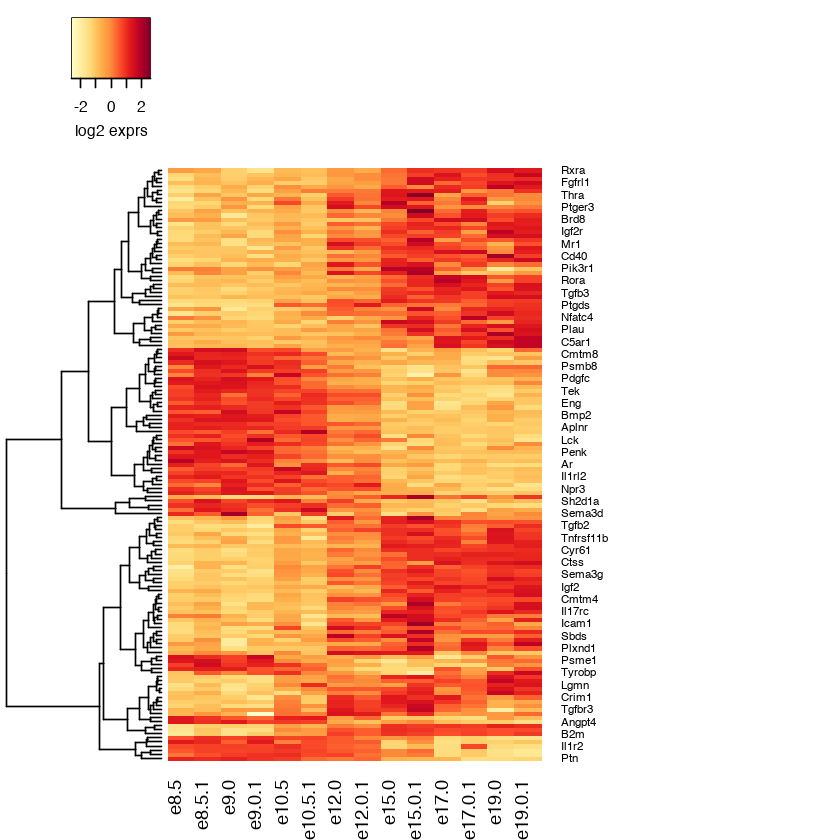

In [251]:
heatmap.2 (as.matrix(decidua.immune.ch), trace="none", keysize = 1,
            density.info = "none", key.title = NA, key.xlab = "log2 exprs", scale = "row", 
           col = col, Rowv = TRUE, Colv = FALSE, margins = c(4,15))

# Extract by GO immune terms

In [252]:
immune_all <- read.csv('GOappend1.csv')

In [264]:
immune_dec_ch_info <- immune_all[immune_all$Symbol %in% toupper(rownames(decidua.immune.ch)) , ]
immune_dec_up_info <- immune_all[immune_all$Symbol %in% toupper(rownames(decidua.immune.up)) , ]
immune_dec_down_info <- immune_all[immune_all$Symbol %in% toupper(rownames(decidua.immune.down)) , ]

In [279]:
write.csv(immune_dec_up_info ,"up_dec_immune_info.csv")
write.csv(immune_dec_down_info ,"down_dec_immune_info.csv")